In [2]:
measurements = []

with open('../data/obj_pose-laser-radar-synthetic-input.txt') as f:
    meas_lines = f.readlines()    

for meas_line in meas_lines:
    meas = dict()
    meas_line = meas_line.split()
    if meas_line[0] == 'L':
        meas['t'] = int(meas_line[3])
        meas['vx'] = float(meas_line[6])
        meas['vy'] = float(meas_line[7])
    elif meas_line[0] == 'R':
        meas['t'] = int(meas_line[4])
        meas['vx'] = float(meas_line[7])
        meas['vy'] = float(meas_line[8])
    measurements.append(meas)

In [3]:
import math
accelerations = []
for i in range(len(measurements)-1):
    dt = (measurements[i+1]['t'] - measurements[i]['t']) / 1000000.0
    v_now = math.sqrt(measurements[i+1]['vx']**2 + measurements[i+1]['vy']**2)
    v_prev = math.sqrt(measurements[i]['vx']**2 + measurements[i]['vy']**2)
    acc = (v_now -v_prev) / dt
    accelerations.append(abs(acc))

In [4]:
import pandas as pd
df = pd.DataFrame(accelerations)
df.describe()

,0
count,499.000000
mean,0.064126
std,0.030869
min,0.001246
25%,0.038183
50%,0.071531
75%,0.092514
max,0.100538


After some trial and error, it looks like a value of 0.6 for both std\_a\_ and std\_yawdd\_ works well.

In [6]:
with open('../build/output.txt') as f:
    out = pd.read_csv(f, sep='\t')
out.head()

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,1.039514e-320,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.735438,0.629569,7.20142,-5.221600e-17,3.991030e-17,radar,7.473050e+01,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.160500,0.494950,7.20449,-1.272100e-01,-1.185730e-02,lidar,2.211070e-01,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.258060,0.533070,7.18978,1.228300e-01,3.065480e-02,radar,1.824840e+00,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.615780,0.595367,7.20321,1.616040e-01,4.624000e-02,lidar,1.675780e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


In [12]:
out_lidar = out[out['sensor_type'] == 'lidar']['NIS']
out_lidar.head()

0    1.039514e-320
2     2.211070e-01
4     1.675780e-01
6     2.544790e-01
8     9.099930e-03
Name: NIS, dtype: float64

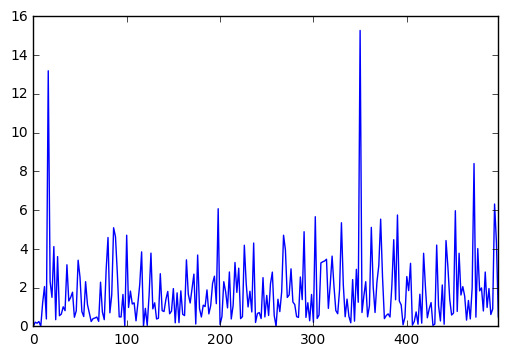

In [14]:
%matplotlib inline
out_lidar.plot()

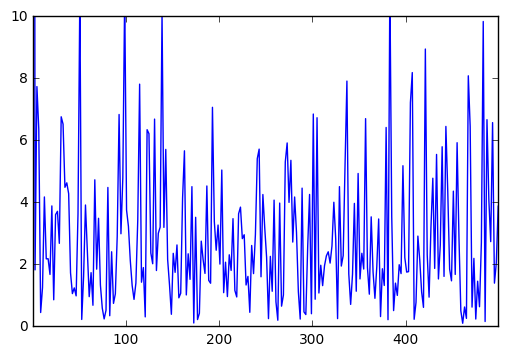

In [16]:
out_radar = out[out['sensor_type'] == 'radar']['NIS']
out_radar.head()
out_radar.plot(ylim=(0,10))